In [1]:
#importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


### Data Understanding

In [2]:
# read the dataset
price=pd.read_csv('train.csv')

In [3]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
price.shape

(1460, 81)

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#let us separate the categorical and numerical variables
print(price.select_dtypes(include='object').columns)
print(price.select_dtypes(['int64','float64']).columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

In [7]:
len(price.select_dtypes(include='object').columns)

43

In [8]:
len(price.select_dtypes(['int64','float64']).columns)

38

### EDA and Data Visualization
#### Check correlation and plot a heatmap

In [9]:
cor = price.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


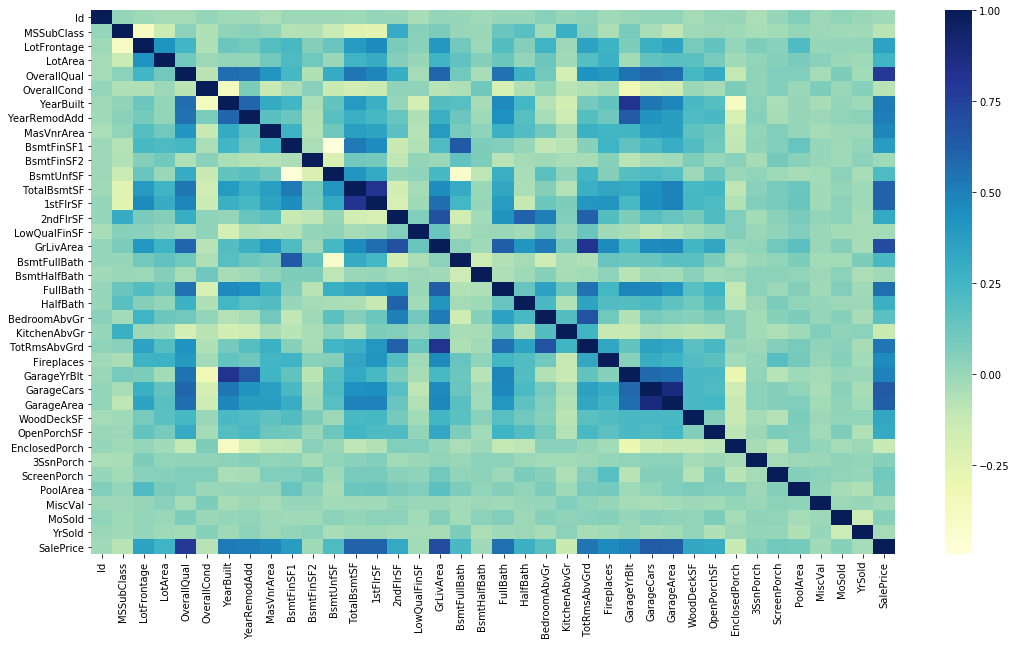

In [10]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

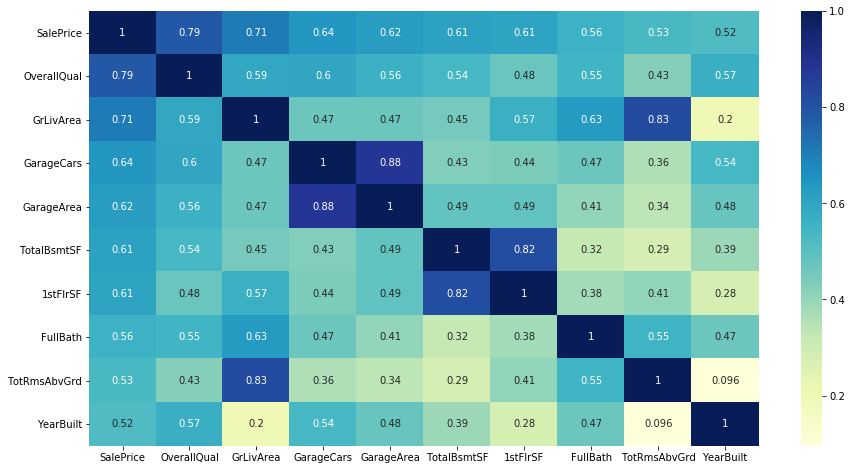

In [11]:
#Choosing the top 10 variables with high correlation
cols = cor.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(price[cols].values.T)
plt.figure(figsize=(15,8))
sns.heatmap(cm, cmap="YlGnBu", annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.show()

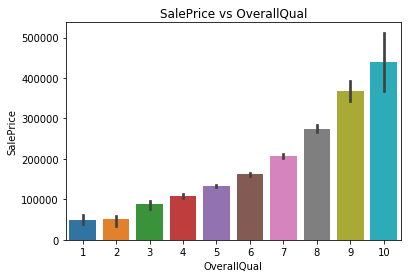

In [12]:
#OverallQual: Rates the overall material and finish of the house
sns.barplot(x="OverallQual",y="SalePrice",data=price)
plt.title("SalePrice vs OverallQual")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

The Overall quality of the house affects the saleprice, higher the quality higher the price

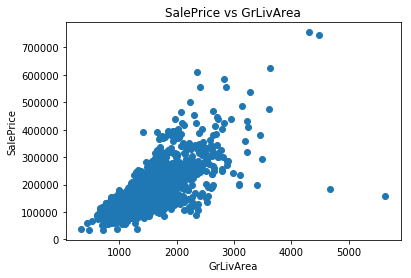

In [13]:
#GrLivArea: Above grade (ground) living area square feet
plt.scatter(price["GrLivArea"],price["SalePrice"])
plt.title("SalePrice vs GrLivArea")
plt.ylabel('SalePrice')
plt.xlabel("GrLivArea")
plt.show()

We see an increasing linear trend to the saleprice vs living area square feet.

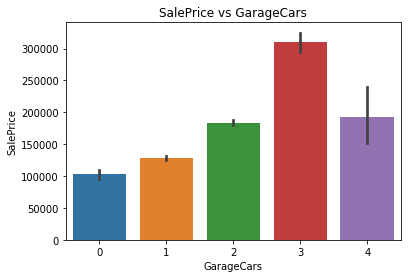

In [14]:
#GarageCars: Size of garage in car capacity
sns.barplot(x="GarageCars",y="SalePrice",data=price)
plt.title("SalePrice vs GarageCars")
plt.ylabel('SalePrice')
plt.xlabel("GarageCars")
plt.show()


We see that the sale price is directly influenced by size of garage in car capicity. Higher the number higher the price.

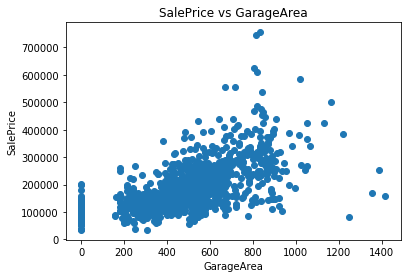

In [15]:
#GarageArea: Size of garage in square feet
plt.scatter(price["GarageArea"],price["SalePrice"])
plt.title("SalePrice vs GarageArea")
plt.ylabel('SalePrice')
plt.xlabel("GarageArea")
plt.show()

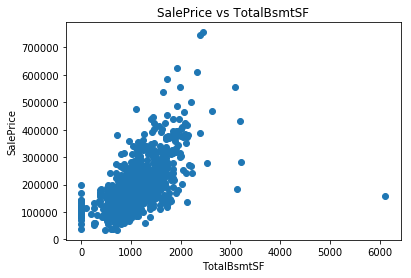

In [16]:
#TotalBsmtSF: Total square feet of basement area
plt.scatter(price["TotalBsmtSF"],price["SalePrice"])
plt.title("SalePrice vs TotalBsmtSF")
plt.ylabel('SalePrice')
plt.xlabel("TotalBsmtSF")
plt.show()

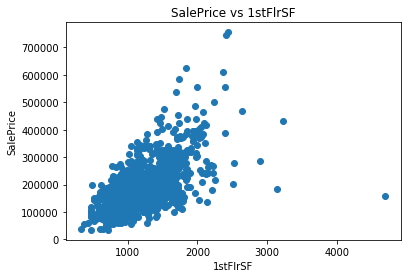

In [17]:
#1stFlrSF: First Floor square feet
plt.scatter(price["1stFlrSF"],price["SalePrice"])
plt.title("SalePrice vs 1stFlrSF")
plt.ylabel('SalePrice')
plt.xlabel("1stFlrSF")
plt.show()

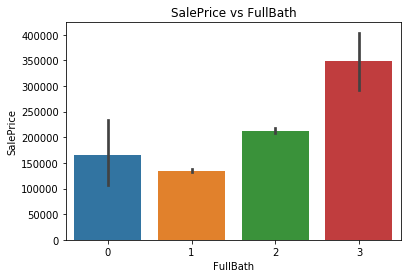

In [18]:
#FullBath: Full bathrooms above grade
sns.barplot(x="FullBath",y="SalePrice",data=price)
plt.title("SalePrice vs FullBath")
plt.ylabel('SalePrice')
plt.xlabel("FullBath")
plt.show()


Sale price varies linearly with number of fullbath

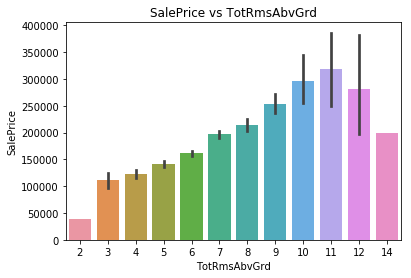

In [19]:
#TotRmsAbvGrd: Total rooms above grade 
sns.barplot(x="TotRmsAbvGrd",y="SalePrice",data=price)
plt.title("SalePrice vs TotRmsAbvGrd")
plt.ylabel('SalePrice')
plt.xlabel("TotRmsAbvGrd")
plt.show()


Linear increasing behaviour for total rooms above grade.

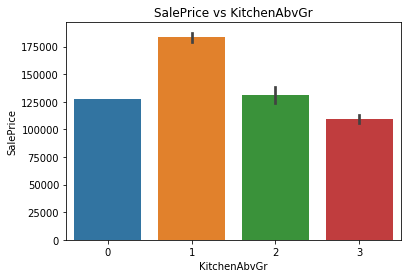

In [20]:
#KitchenAbvGr
sns.barplot(x="KitchenAbvGr",y="SalePrice",data=price)
plt.title("SalePrice vs KitchenAbvGr")
plt.ylabel('SalePrice')
plt.xlabel("KitchenAbvGr")
plt.show()

KitchenAbvGr influences the saleprice negatively

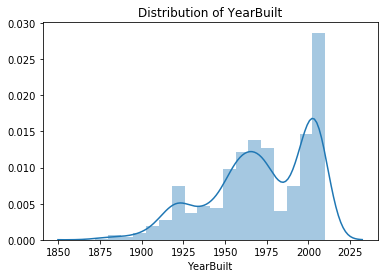

In [21]:
#YearBuilt: Original construction date
sns.distplot(price['YearBuilt'])
plt.title("Distribution of YearBuilt")
plt.show()

New properties cost more than old properties

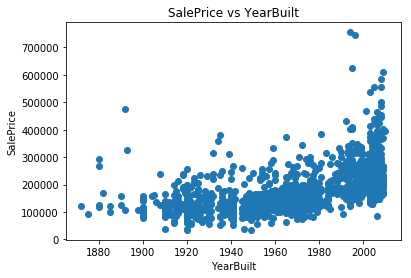

In [22]:
plt.scatter(price["YearBuilt"],price["SalePrice"])
plt.title("SalePrice vs YearBuilt")
plt.ylabel('SalePrice')
plt.xlabel("YearBuilt")
plt.show()

### Check null value

In [23]:
price.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [24]:
#list only the columns containing null
price_null=price.columns[price.isna().any()].tolist()

In [25]:
price[price_null].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
# Null count of the Categorical variables
price[price_null].select_dtypes('object').isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Null value treatment of categorical variables

In [27]:
#Alley: Type of alley access to property
       #Grvl	Gravel
       #Pave	Paved
       #NA 	No alley access
       
price.Alley.value_counts(dropna=False)       

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [28]:
#impute the NaN as "None"
price.loc[price['Alley'].isnull(),['Alley']]='None'

In [29]:
#MasVnrType: Masonry veneer type
    
price.MasVnrType.value_counts(dropna=False)      

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [30]:
#Impute the NAN as "None"
price.loc[price['MasVnrType'].isnull(),['MasVnrType']]='None'

In [31]:
#BsmtQual: Evaluates the height of the basement
       #NA	No Basement
price.BsmtQual.value_counts(dropna=False)      

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [32]:
##Impute the NAN as "None"
price.loc[price['BsmtQual'].isnull(),['BsmtQual']]='None'

In [33]:
price.BsmtCond.value_counts(dropna=False) 

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [34]:
price.BsmtExposure.value_counts(dropna=False) 

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [35]:
#Analyzed the below columns and all have Nan values which refer to "None"
price.loc[price['BsmtCond'].isnull(),['BsmtCond']]='None'
price.loc[price['BsmtExposure'].isnull(),['BsmtExposure']]='None'
price.loc[price['BsmtFinType1'].isnull(),['BsmtFinType1']]='None'
price.loc[price['BsmtFinType2'].isnull(),['BsmtFinType2']]='None'
price.loc[price['FireplaceQu'].isnull(),['FireplaceQu']]='None'
price.loc[price['GarageType'].isnull(),['GarageType']]='None'
price.loc[price['GarageFinish'].isnull(),['GarageFinish']]='None'
price.loc[price['GarageQual'].isnull(),['GarageQual']]='None'
price.loc[price['GarageCond'].isnull(),['GarageCond']]='None'
price.loc[price['PoolQC'].isnull(),['PoolQC']]='None'
price.loc[price['Fence'].isnull(),['Fence']]='None'
price.loc[price['MiscFeature'].isnull(),['MiscFeature']]='None'

In [36]:
price.Electrical.value_counts(dropna=False) 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [37]:
#Impute NaN as "SBrkr"
price.loc[price['Electrical'].isnull(),['Electrical']]='SBrkr'

### Null value treatment of Numerical variables

In [38]:
# Null count of the Numerical variables
price[price_null].select_dtypes(['int64','float64']).isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

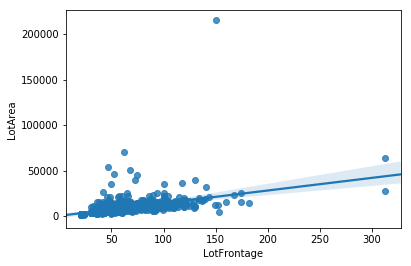

In [39]:
#LotFrontage
sns.regplot(x="LotFrontage", y="LotArea", data=price)

In [40]:
price.iloc[:15,3:5]

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
5,85.0,14115
6,75.0,10084
7,NaN,10382
8,51.0,6120
9,50.0,7420


In [41]:
#upon analyzing the LotFrontage depends on the LotArea, and can be calculated as about 1% of the lotarea.
price.loc[price['LotFrontage'].isnull(),['LotFrontage']]=price['LotArea']*.01

In [42]:
#MasVnrArea
price.loc[:10,['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,None
2,162.0,BrkFace
3,0.0,None
4,350.0,BrkFace
5,0.0,None
6,186.0,Stone
7,240.0,Stone
8,0.0,None
9,0.0,None


In [43]:
# We see that MasVnrArea is missing for MasVnrType='None' and None has a value of 0.
price.loc[price['MasVnrArea'].isnull(),['MasVnrArea','MasVnrType']] 

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None


In [44]:
price.loc[price['MasVnrArea'].isnull(),['MasVnrArea']]=0

In [45]:
#GarageYrBlt
price.loc[:10,['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
5,1993.0,1993
6,2004.0,2004
7,1973.0,1973
8,1931.0,1931
9,1939.0,1939


In [46]:
#We see that the GarageYrBlt is same as YearBuilt.
#for the missing GarageYrBlt it sis because the property does not have any garage. 
#therefore we impute the missing GarageYrBlt with the respective YearBuilt because if garage 
#was present then the year would be same as yearbuilt

price.loc[price['GarageYrBlt'].isnull(),['GarageYrBlt']]=price['YearBuilt']

In [47]:
price['GarageYrBlt']=price['GarageYrBlt'].astype('int64')

In [48]:
# We again check the null counts of the columns
len(price.columns[price.isna().any()].tolist())

0

In [49]:
#drop id column as it a unique identifier.
price=price.drop('Id',1)

In [50]:
price.shape

(1460, 80)

### Data Preparation

### Creating dummy variables for the categorical data

In [51]:
cat=price.select_dtypes(include='object').columns

df1=pd.get_dummies(price,columns=cat,drop_first=True)

In [52]:
df1.shape

(1460, 260)

In [53]:
df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


### Train-Test Split

In [54]:
# Putting feature variable to X
y = df1["SalePrice"]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [55]:
X = df1.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col=X_train.select_dtypes(['int64','float64']).columns

In [58]:
X_train[num_col]=scaler.fit_transform(X_train[num_col])

In [59]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.186583,-0.473765,-0.779861,0.383154,-1.524903,-1.694350,-0.558025,0.043512,-0.293313,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.132657,-0.056845,0.649651,-0.533005,0.717033,0.390956,0.809137,1.160345,-0.293313,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.394783,-0.169324,-0.065105,-1.449164,-0.865510,-1.694350,-0.558025,-0.761296,-0.293313,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.297623,-0.502297,-0.065105,2.215472,-2.019448,0.875911,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.283743,0.082905,-1.494617,0.383154,-2.843689,-1.694350,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0


In [60]:
X_test[num_col]=scaler.transform(X_test[num_col])

In [61]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.283743,-0.144189,-1.494617,0.383154,-0.008299,-0.675945,-0.558025,0.361992,-0.293313,...,0,0,0,0,1,0,0,0,1,0
57,0.035976,0.118777,0.112505,0.649651,-0.533005,1.079700,0.924407,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
780,-0.888086,-0.242103,-0.253368,0.649651,-0.533005,0.782973,0.536443,-0.355087,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
382,0.035976,-0.020023,-0.120412,0.649651,-0.533005,1.145639,1.021398,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1170,0.498007,-0.061663,-0.058786,-0.065105,0.383154,0.189519,-0.384972,-0.558025,0.159714,-0.293313,...,0,0,0,0,1,0,0,0,1,0


### Model Building and Evaluation

### Lasso


In [62]:
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 5)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   12.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,0.094953,0.033108,0.000599,0.000043,20,{'alpha': 20},0.361126,0.850699,0.798200,0.902959,...,0.760802,0.203707,18,0.949681,0.952058,0.951087,0.951868,0.952139,0.951366,0.000921
24,0.102615,0.003516,0.000638,0.000054,50,{'alpha': 50},0.413468,0.871420,0.802635,0.910415,...,0.779809,0.187518,2,0.944982,0.947245,0.945814,0.945723,0.946352,0.946023,0.000751
25,0.052935,0.012896,0.000682,0.000082,100,{'alpha': 100},0.437608,0.889410,0.798220,0.913206,...,0.788953,0.180935,1,0.938679,0.939858,0.938362,0.937644,0.937105,0.938330,0.000941
26,0.009120,0.000392,0.000551,0.000080,500,{'alpha': 500},0.486179,0.898838,0.729349,0.884692,...,0.774048,0.156639,3,0.887210,0.843340,0.879499,0.850182,0.853280,0.862702,0.017339
27,0.006219,0.000276,0.000494,0.000044,1000,{'alpha': 1000},0.459939,0.882155,0.716988,0.875679,...,0.759879,0.162333,20,0.865980,0.814869,0.858367,0.821644,0.826729,0.837518,0.020621


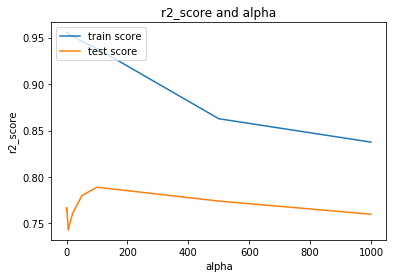

In [64]:
#  plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
#plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.title("r2_score and alpha")
plt.legend(['train score','test score'], loc='upper left')
plt.show()

We select lambda as 500

In [65]:
# model with optimal alpha=500
# lasso regression
from sklearn import metrics
lm = Lasso(alpha=500)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8551000127421091
0.8481762105937368


In [66]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
A=list(zip(cols, model_parameters))

In [82]:
#extract the columns which affect salePrice 
selected = [A[i] for i in range(1,len(A)) if A[i][1] != 0 ]

# take second element for sort
def takeSecond(elem):
    return elem[1]
selected.sort(key=takeSecond,reverse=True)
selected
selected_df=pd.DataFrame(selected)

In [83]:
selected_df.columns = ["Feature", "coefficient"]
selected_df

,Feature,coefficient
0,Neighborhood_NoRidge,30584.320
1,GrLivArea,24831.218
2,Neighborhood_NridgHt,21028.861
3,OverallQual,20106.560
4,BsmtExposure_Gd,12417.774
5,Condition1_Norm,10498.499
6,GarageCars,7886.463
7,Neighborhood_Crawfor,7812.157
8,YearBuilt,7524.730
9,BsmtFinType1_GLQ,5555.179


#### First 10 variables which are significant in predicting the price of a house
    •	Neighborhood_NoRidge
    •	GrLivArea
    •	Neighborhood_NridgHt 
    •	OverallQual 
    •	BsmtExposure_Gd 
    •	Condition1_Norm 
    •	GarageCars 
    •	Neighborhood_Crawfor 
    •	YearBuilt 
    •	BsmtFinType1_GLQ


In [68]:
rcol=[selected[i][0] for i in range(0,len(selected))]

In [69]:
len(rcol)

52

In [70]:
X_train_ridge=X_train[rcol]

In [71]:
X_train_ridge.shape

(1021, 52)

### Ridge

In [72]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_ridge, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007071,0.003647,0.001490,0.001683,0.0001,{'alpha': 0.0001},0.882366,0.727468,0.803281,0.881880,...,0.831737,0.059599,24,0.86297,0.896977,0.879213,0.862795,0.862852,0.872962,0.013573
1,0.002959,0.001472,0.000532,0.000166,0.001,{'alpha': 0.001},0.882367,0.727467,0.803282,0.881882,...,0.831738,0.059599,23,0.86297,0.896977,0.879213,0.862795,0.862852,0.872962,0.013573
2,0.002720,0.000650,0.000712,0.000248,0.01,{'alpha': 0.01},0.882378,0.727457,0.803291,0.881904,...,0.831743,0.059607,22,0.86297,0.896977,0.879213,0.862795,0.862852,0.872962,0.013573
3,0.001987,0.000368,0.000523,0.000271,0.05,{'alpha': 0.05},0.882427,0.727412,0.803335,0.881998,...,0.831768,0.059641,21,0.86297,0.896977,0.879212,0.862795,0.862852,0.872961,0.013574
4,0.002403,0.000306,0.000395,0.000078,0.1,{'alpha': 0.1},0.882488,0.727357,0.803389,0.882115,...,0.831799,0.059682,20,0.86297,0.896977,0.879212,0.862794,0.862852,0.872961,0.013574


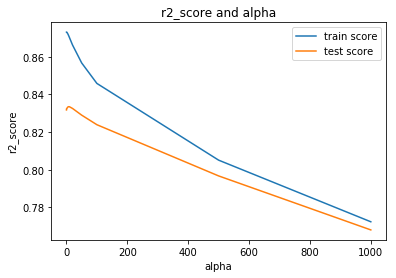

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.title("r2_score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
model_cv.best_params_ 

{'alpha': 8.0}

We select lambda as 8

In [76]:
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, y_train)


Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
# predict
X_test_ridge=X_test[rcol]
y_train_pred = ridge.predict(X_train_ridge)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test_ridge)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8670956317576252
0.8568875826447127
